# CF

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the dataset

In [2]:
ratings = pd.read_excel('userxitem_YM.xlsx')
ratings.head()

,0,3,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.887,0.888,0.889,0.890,0.891,0.892,0.893,0.894,0.895,0.896
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,3,3,0,0,0,0,0,4,5,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,5,0,0,0,0,0,0,0,0,...,0,4,0,0,4,0,0,0,0,0


In [3]:
ratings.shape

(483, 945)

In [4]:
#changing the column names
ratings.columns = [ i for i in range(0, 945)]
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,935,936,937,938,939,940,941,942,943,944
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,3,3,0,0,0,0,0,4,5,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,5,0,0,0,0,0,0,0,0,...,0,4,0,0,4,0,0,0,0,0


In [5]:
#storing all the rows in a list
l = []
for i, r in ratings.iterrows():
    l.append(r.tolist())

In [6]:
#checking if their are any users with no ratings
c = 0
for i in l:
    s = sum(i)
    if(s == 0):
        c += 1
print(c)

0


In [7]:
ratings_list = np.array(l)
ratings_list.shape

(483, 945)

In [8]:
# function to calculate cosine similarity
def cosine_similarity(user1, user2):
    similarity = np.dot(user1,user2)/(np.linalg.norm(user1)*np.linalg.norm(user2))
    similarity = np.round(similarity, 10)
    return similarity

In [9]:
cosine_similarity(ratings_list[0], ratings_list[1])

0.0362075324

In [10]:
# function to calculate cosine similarity on similar rated movies between two users
def sim_of_only_rated_movies(user1, user2):
    u1 = []
    u2 = []
    k = 0
    for i, j in zip(user1, user2):
#         print(f"{k} = {i}")
#         print(f"{k} = {j}")
        k += 1
        if i != 0 and j != 0:
            u1.append(i)
            u2.append(j)
#     print(u1)
#     print(u2)
    if len(u1) == 0:
        return 0
    return cosine_similarity(u1, u2)

In [11]:
sim_of_only_rated_movies(ratings_list[0], ratings_list[1])

1.0

In [12]:
def k_similar_users(ratings_list, target_user_no, k):
    target_user_dict = {}
    target_user = ratings_list[target_user_no]
    for i in range(0,482):
        if i == target_user_no:
            cos_sim = -999
        else:
            user = ratings_list[i]
            cos_sim = sim_of_only_rated_movies(user, target_user)
        target_user_dict[i] = cos_sim
    target_user_dict = dict(sorted(target_user_dict.items(), key=lambda x:x[1], reverse=True))
    target_user_dict = dict(list(target_user_dict.items())[:k])
    return target_user_dict

In [13]:
target_user_no = 0
k = 30
k_similar_users(ratings_list, target_user_no, k)

{1: 1.0,
 2: 1.0,
 4: 1.0,
 5: 1.0,
 7: 1.0,
 10: 1.0,
 11: 1.0,
 15: 1.0,
 17: 1.0,
 19: 1.0,
 20: 1.0,
 26: 1.0,
 31: 1.0,
 32: 1.0,
 34: 1.0,
 45: 1.0,
 47: 1.0,
 48: 1.0,
 50: 1.0,
 58: 1.0,
 59: 1.0,
 64: 1.0,
 66: 1.0,
 68: 1.0,
 70: 1.0,
 71: 1.0,
 74: 1.0,
 75: 1.0,
 76: 1.0,
 80: 1.0}

In [14]:
# calculates mean of all the similar users and movies
def mean_of_k_sim_user(movie_list, sim_user):
    c = 0
    s = 0
    for i in sim_user:
        if movie_list[i] != 0:
            s += movie_list[i]
            c += 1
    if c == 0:
        return 0
    s = s/c     
    return s

In [15]:
def pred_k_sim_users(ratings_list, k):
    error = 0
    mae_total_error = 0
    mse_total_error = 0
    pred_movies = {}
    for i in range(0,483):
        target_user_no = i
        sim_user_dict = k_similar_users(ratings_list, target_user_no, k)
        sim_user = list(sim_user_dict.keys())
        movie_count = 0
        mae_total_user_error = 0
        mse_total_user_error = 0
        # now we check the prediction for all movies
        for j in range(0,945):
            movie_list = ratings_list[:,j]
            pred = mean_of_k_sim_user(movie_list, sim_user)
            if movie_list[target_user_no] != 0 :
                if pred != 0 :
                    movie_count += 1
                    error = movie_list[target_user_no] - pred
                    mae_total_user_error += abs(error)
                    mse_total_user_error += (error * error)
            pred_movies[i] = movie_count
        if movie_count != 0:
            mae_total_user_error /= movie_count
            mse_total_user_error /= movie_count
        mae_total_error += mae_total_user_error
        mse_total_error += mse_total_user_error
#         print(f"user no. {i} : {total_user_error} and   movies count is : {movie_count}")
    mse_total_error /= 483
    mae_total_error /= 483
    print("MAE :", mae_total_error)
    print("MSE :", mse_total_error)
    print("RMSE :", np.sqrt(mse_total_error))
#     print("total error :", total_error)
    return mae_total_error

In [16]:
pred_k_sim_users(ratings_list, 30)

MAE : 0.6885695243996465
MSE : 1.3562490547491923
RMSE : 1.1645810640523022


0.6885695243996465

In [17]:
# making prediction using resnick prediction
def resnick_prediction(user_no, ratings, sim_user_dict, movie_list):
    def average_ratings_of_user(user_no, ratings_list):
        c = 0
        mean = 0
        for i in ratings[user_no]:
            if i != 0:
                c += 1
                mean += i
        mean /= c
        return mean
    u_u = average_ratings_of_user(user_no, ratings_list)
    vi = []
    v_u = []
    sim_uv = []
    for i in sim_user_dict.keys():
        vi.append(movie_list[i])
        v_u.append(average_ratings_of_user(i, ratings_list))
        sim_uv.append(sim_user_dict[i])
    ku = np.sum(sim_uv)
    vi = np.array(vi)
    v_u = np.array(v_u)
    sim_uv = np.array(sim_uv)
    if ku == 0:
        return 0
    prediction = u_u + np.sum((vi - v_u) * sim_uv / ku)
    if prediction > 0.5:    
        prediction = np.round(prediction, 0)
    else:
        prediction = 1.0
    return prediction

In [18]:
movie_list = ratings_list[:,10]
user_no=1
resnick_prediction(user_no, ratings_list, k_similar_users(ratings_list, target_user_no, k), movie_list)

1.0

In [19]:
# code to check the prediction accuracy of resnick prediction
def pred_resnick(ratings_list, k):
    error = 0
    mae_total_error = 0
    mse_total_error = 0
    pred_movies = {}
    for i in range(0,483):
        target_user_no = i
        movie_count = 0
        mae_total_user_error = 0
        mse_total_user_error = 0
        sim_user_dict = k_similar_users(ratings_list, target_user_no, k)
        sim_user = list(sim_user_dict.keys())
        # now we check the prediction for all movies
        for j in range(0,945):
            movie_list = ratings_list[:,j]
            pred = resnick_prediction(target_user_no, ratings_list, sim_user_dict, movie_list)
            if movie_list[target_user_no] != 0 :
                if pred != 0 :
                    movie_count += 1
                    error = movie_list[target_user_no] - pred
                    mae_total_user_error += abs(error)
                    mse_total_user_error += (error * error)
            pred_movies[i] = movie_count
        if movie_count != 0:
            mae_total_user_error /= movie_count
            mse_total_user_error /= movie_count
        mae_total_error += mae_total_user_error
        mse_total_error += mse_total_user_error
#         print(f"user no. {i} : {mae_total_user_error} and   movies count is : {movie_count}")
    mse_total_error /= 483
    mae_total_error /= 483
    print("MAE :", mae_total_error)
    print("MSE :", mse_total_error)
    print("RMSE :", np.sqrt(mse_total_error))
    return mae_total_error

In [20]:
# We calculate the error on only k = 10 as resnick prediction has a high computational cost
k = 10
pred_resnick(ratings_list, k)

MAE : 2.8679290755098403
MSE : 9.84167352616549
RMSE : 3.1371441672587332


2.8679290755098403

In [21]:
k_number = []
k_mae = []

In [22]:
# We are performing this to check on which k value gives the least error 
# We can perform this similar code for resnick prediction to get on which value it gives the least error
for k in range(10,50):
    k_number.append(k)
    mae = pred_k_sim_users(ratings_list, k)
    k_mae.append(mae)
    print(f"{k} : {mae}")

MAE : 0.6696642425743018
MSE : 1.4156694310464426
RMSE : 1.1898190749212432
10 : 0.6696642425743018
MAE : 0.6691336306586195
MSE : 1.417802525402463
RMSE : 1.1907151319280624
11 : 0.6691336306586195
MAE : 0.6690355240604948
MSE : 1.4135700888308016
RMSE : 1.1889365369231453
12 : 0.6690355240604948
MAE : 0.6686268003717684
MSE : 1.407654542585333
RMSE : 1.1864461819169605
13 : 0.6686268003717684
MAE : 0.6706686365550387
MSE : 1.4074385239600378
RMSE : 1.1863551424257568
14 : 0.6706686365550387
MAE : 0.672113573108813
MSE : 1.4089448725289362
RMSE : 1.1869898367420575
15 : 0.672113573108813
MAE : 0.6755933017663641
MSE : 1.4090846228777676
RMSE : 1.1870487028246852
16 : 0.6755933017663641
MAE : 0.6744188598737775
MSE : 1.392571848492091
RMSE : 1.1800728149110506
17 : 0.6744188598737775
MAE : 0.6750659425432483
MSE : 1.3800719412829812
RMSE : 1.174764632291499
18 : 0.6750659425432483
MAE : 0.6779433408353354
MSE : 1.3914489051723555
RMSE : 1.1795969248740672
19 : 0.6779433408353354
MAE : 

In [23]:
df = pd.DataFrame({'K value': k_number, 'MAE': k_mae})
df

,K value,MAE
0,10,0.669664
1,11,0.669134
2,12,0.669036
3,13,0.668627
4,14,0.670669
5,15,0.672114
6,16,0.675593
7,17,0.674419
8,18,0.675066
9,19,0.677943


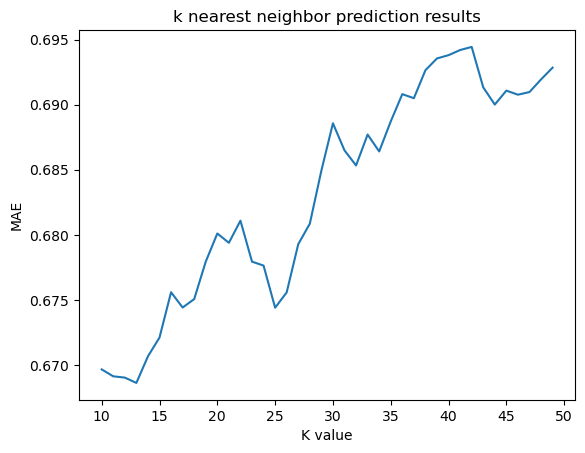

In [25]:
plt.plot(k_number, k_mae)
plt.title("k nearest neighbor prediction results")
plt.xlabel("K value")
plt.ylabel("MAE")
plt.show()